# **<font size=4 color=#BB3D00 face=微软雅黑>去除信号中的峰值</font>**

有时数据会出现不必要的瞬变（即峰值）。中位数滤波是消除它的好方法。

## <font size=3 face=微软雅黑>※Matlab案例</font>

网址：https://ww2.mathworks.cn/help/signal/ug/remove-spikes-from-a-signal.html    
描述：本案例由1个示例构成。
### - <font color=DarkOrChid size=3>示例1：以存在 60 Hz 电线噪声时模拟仪器输入的开环电压为例，去除信号中的峰值</font>

## <font size=3 face=微软雅黑>※Python案例</font>

针对以上案例，采用Python语言实现。

### - <font color=DarkOrChid size=3>示例1：以存在 60 Hz 电线噪声时模拟仪器输入的开环电压为例，去除信号中的峰值</font>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.signal as signal
import scipy.io as scio

In [ ]:
!wget https://github.com/spaitlab/pyspt/blob/561df562a07d17f6f38fc9f35dff62bbe47adc53/2-%E4%BF%A1%E5%8F%B7%E7%94%9F%E6%88%90%E5%92%8C%E9%A2%84%E5%A4%84%E7%90%86/2-1-%E5%B9%B3%E6%BB%91%E5%92%8C%E5%8E%BB%E5%99%AA/2-1-4-%E5%8E%BB%E9%99%A4%E4%BF%A1%E5%8F%B7%E4%B8%AD%E7%9A%84%E5%B3%B0%E5%80%BC/openloop60hertz.mat?raw=true

In [ ]:
!ls

In [ ]:
!mv openloop60hertz.mat\?raw\=true openloop60hertz.mat

In [2]:
data = scio.loadmat('openloop60hertz.mat')
hz_60 = data['openLoopVoltage']
datalen = len(hz_60)
T = np.arange(0, datalen)

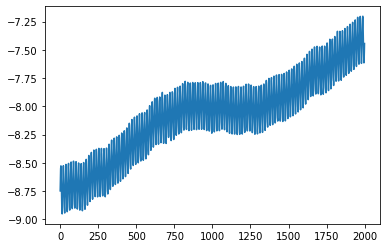

In [3]:
plt.plot(T, hz_60)
plt.show()

通过在随机点添加随机符号以加入瞬变以破坏信号。重置随机数生成器以获得可再现性。

In [4]:
spikeSignal = np.zeros(datalen)
spks = np.arange(10, 1990, 100)
randadd = np.random.randint(-10, 10, size=len(spks))
spikeSignal[spks + randadd] = np.random.randn(len(spks))

In [6]:
hz_60 = hz_60.reshape(len(hz_60),)
noisySignal = hz_60 + spikeSignal

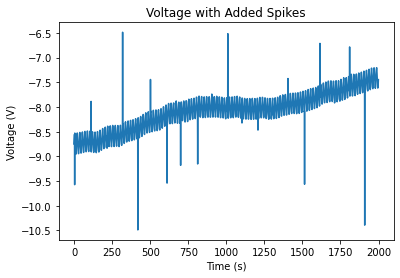

In [7]:
plt.plot(T, noisySignal)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Voltage with Added Spikes')
plt.show()

函数**medfilt**将信号的每个点替换为该点和指定数量的邻点的中位数。因此，中位数滤波会丢弃与其周围环境相差很大的点。通过使用三个邻点的集合计算中位数来对信号进行滤波。注意峰值是如何消失的。

In [8]:
medfiltSignal = signal.medfilt(noisySignal)

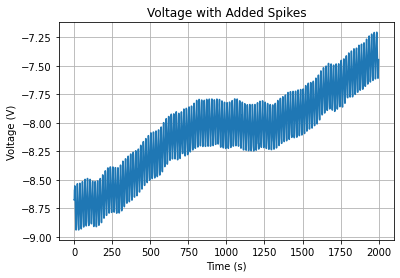

In [9]:
plt.plot(medfiltSignal)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Voltage with Added Spikes')
plt.grid()
plt.show()